# Einführungsbeispiele NLP

Angelehnt an D. Sarkar: Text Analytics with Python (2nd Edition)

Ergänzt und aktualisiert von Heiko Rölke


In [4]:
import nltk
import spacy
import numpy as np
import pandas as pd

nlp = spacy.load('en_core_web_trf')

In [5]:
sentence = "The brown fox is quick and he is jumping over the lazy dog"
sentence

'The brown fox is quick and he is jumping over the lazy dog'

In [6]:
words = sentence.split()
np.random.shuffle(words)
print(words)

['and', 'brown', 'dog', 'The', 'lazy', 'is', 'quick', 'is', 'the', 'he', 'jumping', 'fox', 'over']


In [7]:
pos_tags = nltk.pos_tag(sentence.split())
pd.DataFrame(pos_tags).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,The,brown,fox,is,quick,and,he,is,jumping,over,the,lazy,dog
1,DT,JJ,NN,VBZ,JJ,CC,PRP,VBZ,VBG,IN,DT,JJ,NN


In [8]:
spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in nlp(sentence)]
pd.DataFrame(spacy_pos_tagged).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,The,brown,fox,is,quick,and,he,is,jumping,over,the,lazy,dog
1,DT,JJ,NN,VBZ,JJ,CC,PRP,VBZ,VBG,IN,DT,JJ,NN
2,DET,ADJ,NOUN,AUX,ADJ,CCONJ,PRON,AUX,VERB,ADP,DET,ADJ,NOUN


In [9]:
grammar = '''
            NP: {<DT>?<JJ>?<NN.*>}  
            ADJP: {<JJ>}
            ADVP: {<RB.*>}
            PP: {<IN>}      
            VP: {<MD>?<VB.*>+}
          '''

pos_tagged_sent = nltk.pos_tag(sentence.split())
rp = nltk.RegexpParser(grammar)
shallow_parsed_sent = rp.parse(pos_tagged_sent)
print(shallow_parsed_sent)

(S
  (NP The/DT brown/JJ fox/NN)
  (VP is/VBZ)
  (ADJP quick/JJ)
  and/CC
  he/PRP
  (VP is/VBZ jumping/VBG)
  (PP over/IN)
  (NP the/DT lazy/JJ dog/NN))


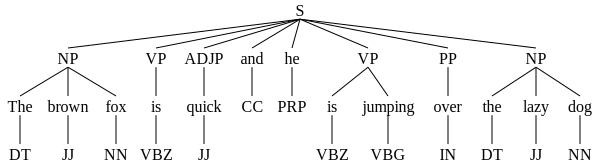

In [11]:
# visualize shallow parse tree
# !pip install svgling  # falls notwendig, zB im Browser...

shallow_parsed_sent

In [12]:
from spacy import displacy

displacy.render(nlp(sentence), jupyter=True, 
                options={'distance': 100,
                         'arrow_stroke': 1.5,
                         'arrow_width': 8})


In [13]:
spacy.explain("amod")

'adjectival modifier'

# Auf Deutsch geht es auch...

In [14]:
nlp = spacy.load("de_dep_news_trf")

In [15]:
satz = "Der braune Fuchs springt über den schlafenden Hund."

spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in nlp(satz)]
pd.DataFrame(spacy_pos_tagged).T

,0,1,2,3,4,5,6,7,8
0,Der,braune,Fuchs,springt,über,den,schlafenden,Hund,.
1,ART,ADJA,NN,VVFIN,APPR,ART,ADJA,NN,$.
2,DET,ADJ,NOUN,VERB,ADP,DET,ADJ,NOUN,PUNCT


In [ ]:
cols = ["Wort", "Wortart", "Erklärung", "Wort-Tag", "Erklärung"]
rows = []
for token in nlp(satz):
    row = token.text, token.pos_, spacy.explain(token.pos_), token.tag_,  spacy.explain(token.tag_)
    rows.append(row)
df = pd.DataFrame(rows, columns=cols)
df

In [ ]:
spacy.displacy.render(nlp(satz), options={'distance': 100,'arrow_stroke': 1.5,'arrow_width': 8})

In [ ]:
spacy.explain("nk")

In [ ]:
spacy.explain("sb")